# **1.Preparação dos Dados**

In [2]:
# Instalação das dependências necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importação dos arquivos em suas respectivas variáveis

# Dataset cliente
clientes = pd.read_csv('olist_customers_dataset.csv')

# Dataset pedidos
pedidos = pd.read_csv('olist_orders_dataset.csv')

# Dataset itens
itens = pd.read_csv('olist_order_items_dataset.csv')

# Dataset pagamentos
pagamentos = pd.read_csv('olist_order_payments_dataset.csv')

# Dataset produtos
produtos = pd.read_csv('olist_products_dataset.csv')

# Dataset categorias
categorias = pd.read_csv('product_category_name_translation.csv')

# Dataset avaliacoes
avaliacoes = pd.read_csv('olist_order_reviews_dataset.csv')

# Dataset entregas
entregas = pd.read_csv('olist_geolocation_dataset.csv')

# Dataset vendedores
vendedores = pd.read_csv('olist_sellers_dataset.csv')

In [12]:
# Verificação de valores nulos por dataset
def verificar_nulos_por_dataset(datasets: dict):
    print("Verificação de valores nulos por dataset:\n")
    for nome, df in datasets.items():
        nulos = df.isnull().sum()
        nulos_presentes = nulos[nulos > 0]

        print(f"{nome}:")
        if not nulos_presentes.empty:
            print(nulos_presentes)
            print(f"Total de colunas com valores nulos: {nulos_presentes.shape[0]}\n")
        else:
            print("Nenhuma coluna com valores nulos.\n")


datasets = {
    "Clientes": clientes,
    "Pedidos": pedidos,
    "Itens do pedido": itens,
    "Pagamentos": pagamentos,
    "Produtos": produtos,
    "Categorias": categorias,
    "Avaliações": avaliacoes,
    "Entregas": entregas,
    "Vendedores": vendedores
}

verificar_nulos_por_dataset(datasets)

Verificação de valores nulos por dataset:

Clientes:
Nenhuma coluna com valores nulos.

Pedidos:
Nenhuma coluna com valores nulos.

Itens do pedido:
Nenhuma coluna com valores nulos.

Pagamentos:
Nenhuma coluna com valores nulos.

Produtos:
Nenhuma coluna com valores nulos.

Categorias:
Nenhuma coluna com valores nulos.

Avaliações:
Nenhuma coluna com valores nulos.

Entregas:
Nenhuma coluna com valores nulos.

Vendedores:
Nenhuma coluna com valores nulos.



In [11]:
# Remoção de valores nulos

def remocao_valores_nulos():
    global clientes, pedidos, itens, pagamentos, produtos, categorias, avaliacoes, entregas, vendedores

    clientes = clientes.dropna()
    pedidos = pedidos.dropna()
    itens = itens.dropna()
    pagamentos = pagamentos.dropna()
    produtos = produtos.dropna()
    categorias = categorias.dropna()
    avaliacoes = avaliacoes.dropna()
    entregas = entregas.dropna()
    vendedores = vendedores.dropna()

    print("Valores nulos removidos de todos os datasets.")

remocao_valores_nulos()

Valores nulos removidos de todos os datasets.


In [19]:
# Verificação de valores duplicados por dataset
def verificar_duplicados_por_dataset(datasets: dict):
    print("Verificação de valores duplicados por dataset:\n")

    for nome, df in datasets.items():
        duplicados = df[df.duplicated()]
        total_duplicados = duplicados.shape[0]

        print(f"{nome}:")
        if total_duplicados > 0:
            print(f"Total de linhas duplicadas: {total_duplicados}")
            print("Exemplo de duplicatas:")
            print(duplicados.head(), "\n")
        else:
            print("Nenhuma linha duplicada encontrada.\n")


datasets = {
    "Clientes": clientes,
    "Pedidos": pedidos,
    "Itens do pedido": itens,
    "Pagamentos": pagamentos,
    "Produtos": produtos,
    "Categorias": categorias,
    "Avaliações": avaliacoes,
    "Entregas": entregas,
    "Vendedores": vendedores
}

verificar_duplicados_por_dataset(datasets)

Verificação de valores duplicados por dataset:

Clientes:
Nenhuma linha duplicada encontrada.

Pedidos:
Nenhuma linha duplicada encontrada.

Itens do pedido:
Nenhuma linha duplicada encontrada.

Pagamentos:
Nenhuma linha duplicada encontrada.

Produtos:
Nenhuma linha duplicada encontrada.

Categorias:
Nenhuma linha duplicada encontrada.

Avaliações:
Nenhuma linha duplicada encontrada.

Entregas:
Nenhuma linha duplicada encontrada.

Vendedores:
Nenhuma linha duplicada encontrada.



In [18]:
# Remoção de valores duplicados

def remocao_valores_duplicados():
  global clientes, pedidos, itens, pagamentos, produtos, categorias, avaliacoes, entregas, vendedores

  clientes = clientes.drop_duplicates()
  pedidos = pedidos.drop_duplicates()
  itens = itens.drop_duplicates()
  pagamentos = pagamentos.drop_duplicates()
  produtos = produtos.drop_duplicates()
  categorias = categorias.drop_duplicates()
  avaliacoes = avaliacoes.drop_duplicates()
  entregas = entregas.drop_duplicates()
  vendedores = vendedores.drop_duplicates()

  print("Valores duplicados removidos de todos os datasets.")

remocao_valores_duplicados()

Valores nulos removidos de todos os datasets.


In [22]:
# Verificação de colunas por dataset
print(clientes.columns)
print(pedidos.columns)
print(itens.columns)
print(pagamentos.columns)
print(produtos.columns)
print(categorias.columns)
print(avaliacoes.columns)
print(entregas.columns)
print(vendedores.columns)

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
Index(['product_category_name', 'product_category_name_english'], dtype='object')
Index(['review_id', 'order_id', 'revi

In [23]:
# Padronizando formato de nomenclatura das colunas
clientes.columns = clientes.columns.str.lower()
pedidos.columns = pedidos.columns.str.lower()
itens.columns = itens.columns.str.lower()
pagamentos.columns = pagamentos.columns.str.lower()
produtos.columns = produtos.columns.str.lower()
categorias.columns = categorias.columns.str.lower()
avaliacoes.columns = avaliacoes.columns.str.lower()
entregas.columns = entregas.columns.str.lower()
vendedores.columns = vendedores.columns.str.lower()

In [24]:
# Padronizando colunas no formato datetime
pedidos['order_purchase_timestamp'] = pd.to_datetime(pedidos['order_purchase_timestamp'])
pedidos['order_approved_at'] = pd.to_datetime(pedidos['order_approved_at'])
pedidos['order_delivered_carrier_date'] = pd.to_datetime(pedidos['order_delivered_carrier_date'])
pedidos['order_delivered_customer_date'] = pd.to_datetime(pedidos['order_delivered_customer_date'])
pedidos['order_estimated_delivery_date'] = pd.to_datetime(pedidos['order_estimated_delivery_date'])

avaliacoes['review_creation_date'] = pd.to_datetime(avaliacoes['review_creation_date'])
avaliacoes['review_answer_timestamp'] = pd.to_datetime(avaliacoes['review_answer_timestamp'])

In [27]:
# Verificação da alteração anterior
print(pedidos.dtypes)
print(avaliacoes.dtypes)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object
review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object


Durante a importação das informações foi visto que não havia uma padronização no formato do tipo de dados para colunas no formato de data. Durante o processo de importação dos dados brutos fizemos a verificação de dados nulos e duplicados, fazendo a remoção dos mesmos para termos dados limpos para ser consolidados e levados em consideração para uma análise exploratória.

O passo inicial para se trabalhar com os dados obtidos foi feito com sucesso e agora daremos inicio a uma análise mais detalhada das informações.

# **2. Análise Exploratória de Dados**

Neste módulos responderemos algumas perguntas utilizando python e a biblioteca pandas.

### a) Qual o volume de pedidos por mês? Existe sazonalidade nas vendas?

Buscamos entender a evolução temporal das vendas ao longo dos meses nessa análise:

Extração de mês e ano do campo ***oder_purchase_timestamp*** da tabela de pedidos;
Agrupamento dos dados por mês (ano_mes);
Contagem de número de pedidos por mês.

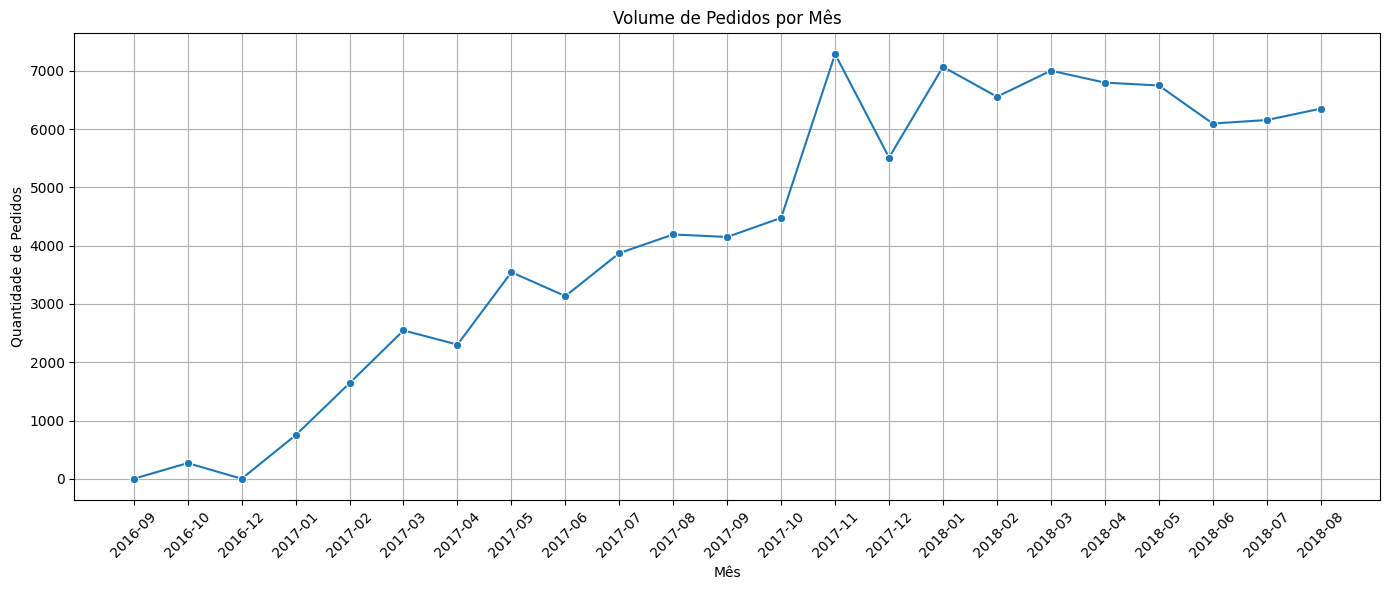

In [28]:
pedidos['order_purchase_timestamp'] = pd.to_datetime(pedidos['order_purchase_timestamp'])

pedidos['ano_mes'] = pedidos['order_purchase_timestamp'].dt.to_period('M').astype(str)

pedidos_por_mes = pedidos.groupby('ano_mes')['order_id'].count().reset_index()
pedidos_por_mes.columns = ['mes', 'quantidade_pedidos']

plt.figure(figsize=(14, 6))
sns.lineplot(data=pedidos_por_mes, x='mes', y='quantidade_pedidos', marker='o')
plt.title('Volume de Pedidos por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# O gráfico abaixo mostra a tendência de vendas ao longo do tempo. Podemos observar os padrões sazonais e crescimento ou queda na demanda.

### b) Qual a distribuição do tempo de entrega dos pedidos?

Para responder essa pergunta, analisamos o tempo médio que os pedidos levaram para ser entregues.

Cálculo da diferença de dias entre ***order_delivered_customer_date*** e ***order_purchase_timestamp***;
Aplicação de filtro em pedidos com valores positivos;
Visualização da distribuição em um histograma com densidade (kde).

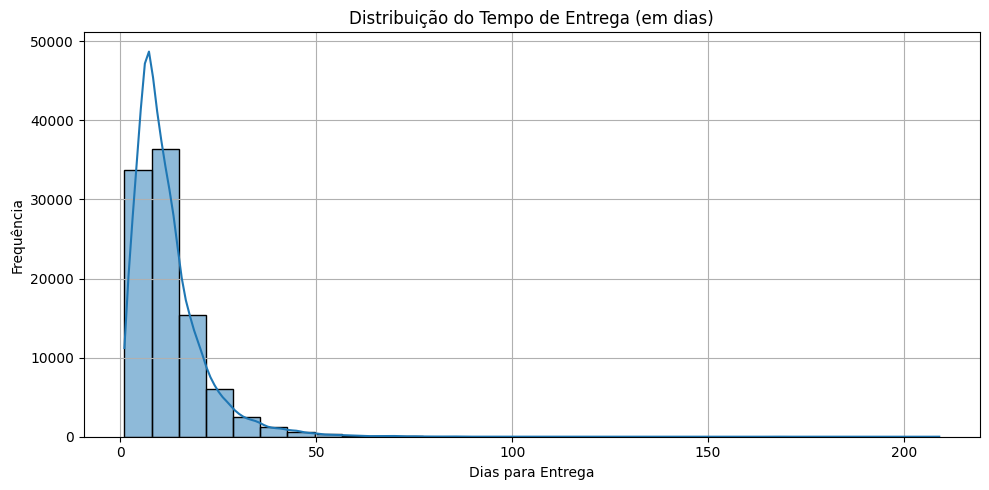

In [29]:
pedidos['order_delivered_customer_date'] = pd.to_datetime(pedidos['order_delivered_customer_date'])
pedidos['order_purchase_timestamp'] = pd.to_datetime(pedidos['order_purchase_timestamp'])

pedidos['dias_entrega'] = (pedidos['order_delivered_customer_date'] - pedidos['order_purchase_timestamp']).dt.days

tempo_entrega = pedidos[pedidos['dias_entrega'] > 0]

plt.figure(figsize=(10, 5))
sns.histplot(tempo_entrega['dias_entrega'], bins=30, kde=True)
plt.title('Distribuição do Tempo de Entrega (em dias)')
plt.xlabel('Dias para Entrega')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()

# O gráfico abaixo é importante para avaliar a eficiência logística e identificar possíveis problemas no processo de entrega.

### c) Qual a relação entre o valor do frete e a distância de entrega?

Para sabermos se há uma correlação entre o valor do frete e a distância entre cliente e vendedores, foram feitos os seguintes passos:

Médias de latitude e longitude por prefixo de CEP usando a base da geolocalização;
Cruzamento de coordenadas com os dados de clientes e vendedores;
Utilização da fórmula de Haversine para calcular a distância geográfica entre os dois pontos;
Visualização da relação entre ***freight_value*** e ***distancia_km***.

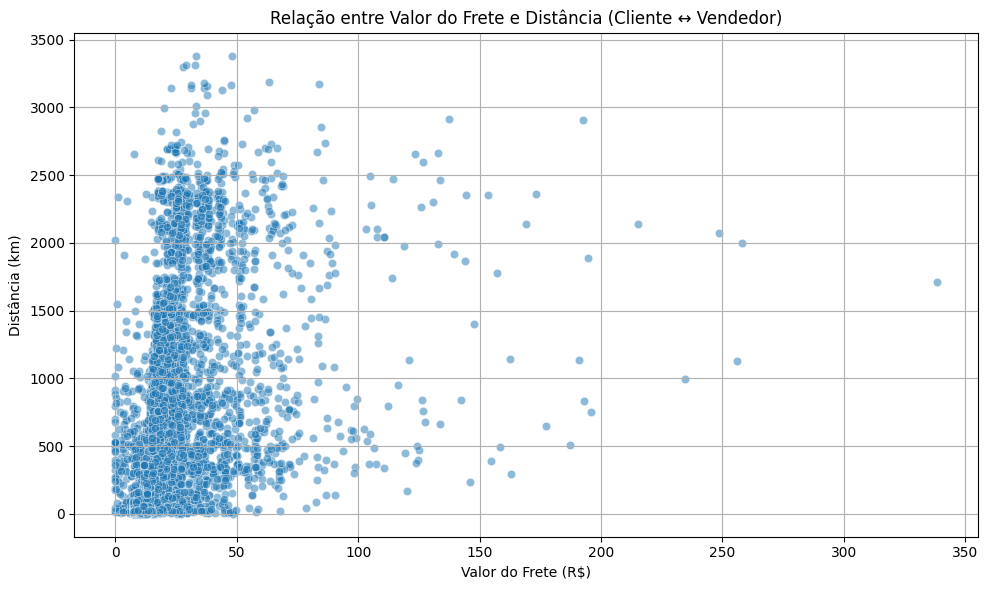

In [31]:
# Função haversine
from math import radians, cos, sin, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c



# Agrupamento de entregas por prefixo de CEP
# Aqui calculamos a média das coordenadas (latitude e longitude)
# para cada grupo de CEP, com o objetivo de associar localização aproximada
geo_grouped = entregas.groupby('geolocation_zip_code_prefix')[['geolocation_lat', 'geolocation_lng']].mean().reset_index()



# Adiciona uma coluna com o prefixo do CEP para facilitar o merge com o geo_grouped
clientes['zip_prefix'] = clientes['customer_zip_code_prefix']



# Faz a junção da base de clientes com as coordenadas geográficas agrupadas
# A junção é feita com base no prefixo do CEP
clientes_geo = clientes.merge(
    geo_grouped,
    left_on='zip_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
).rename(columns={
    'geolocation_lat': 'geolocation_lat_cliente',       # Renomeia latitude para deixar claro que é do cliente
    'geolocation_lng': 'geolocation_lng_cliente'        # Renomeia longitude para cliente
})



# Adiciona uma coluna com o prefixo do CEP dos vendedores
vendedores['zip_prefix'] = vendedores['seller_zip_code_prefix']



# Faz a junção da base de vendedores com as coordenadas agrupadas
# Utilizando o mesmo princípio dos clientes
vendedores_geo = vendedores.merge(
    geo_grouped,
    left_on='zip_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
).rename(columns={
    'geolocation_lat': 'geolocation_lat_vendedor',      # Renomeia latitude para vendedor
    'geolocation_lng': 'geolocation_lng_vendedor'       # Renomeia longitude para vendedor
})



# Criação do dataframe unificado com informações de cliente, vendedor e pedido
# Junção de:
# 1. Itens do pedido com os pedidos (para trazer dados de entrega, datas etc.)
# 2. Dados geográficos do cliente (com base no customer_id)
# 3. Dados geográficos do vendedor (com base no seller_id)
df_geo = itens.merge(pedidos, on='order_id', how='left') \
              .merge(clientes_geo[['customer_id', 'geolocation_lat_cliente', 'geolocation_lng_cliente']], on='customer_id', how='left') \
              .merge(vendedores_geo[['seller_id', 'geolocation_lat_vendedor', 'geolocation_lng_vendedor']], on='seller_id', how='left')



# Calcula a distância entre cliente e vendedor utilizando a fórmula de Haversine
# A distância é calculada linha a linha (axis=1)
df_geo['distancia_km'] = df_geo.apply(lambda row: haversine(
    row['geolocation_lat_cliente'], row['geolocation_lng_cliente'],
    row['geolocation_lat_vendedor'], row['geolocation_lng_vendedor']
), axis=1)



# Criação do gráfico de dispersão (scatter plot)
# Representa a relação entre o valor do frete e a distância entre cliente e vendedor
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
sns.scatterplot(
    data=df_geo.sample(10000),    # Amostra de 10.000 registros para melhor visualização
    x='freight_value',            # Eixo X: valor do frete
    y='distancia_km',             # Eixo Y: distância calculada
    alpha=0.5                     # Transparência dos pontos
)



# Títulos e labels do gráfico
plt.title('Relação entre Valor do Frete e Distância (Cliente ↔ Vendedor)')
plt.xlabel('Valor do Frete (R$)')
plt.ylabel('Distância (km)')
plt.grid(True)
plt.tight_layout()
plt.show()


### d) Quais são as categorias de produtos mais vendidas em termos de faturamento?

Para identificarmos as categorias que mais geram receita, realizamos as seguintes ações:

Cálculo do faturamento total por item (***price*** + ***freight_value***);
Agrupamento por ***product_category_name***;
Soma do faturamento total por categoria;
Visualização das 10 categorias com maior faturamento.

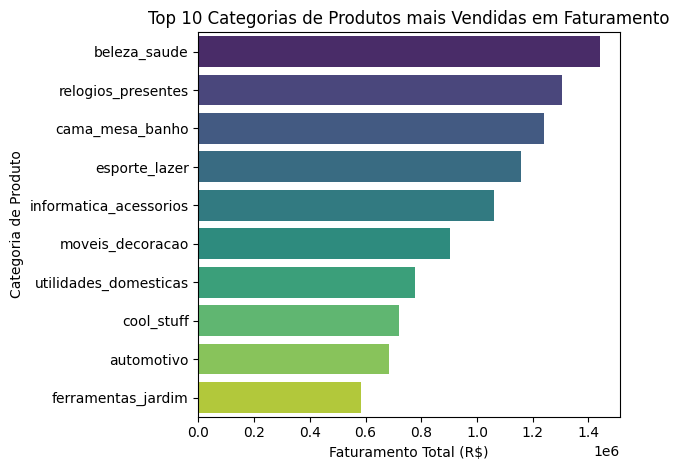

     product_category_name  faturamento_total
11            beleza_saude         1441248.07
66      relogios_presentes         1305541.61
13         cama_mesa_banho         1241681.72
32           esporte_lazer         1156656.48
44  informatica_acessorios         1059272.40
54        moveis_decoracao          902511.79
72   utilidades_domesticas          778397.77
26              cool_stuff          719329.95
8               automotivo          685384.32
40      ferramentas_jardim          584219.21


In [33]:
df_itens_produtos = itens.merge(produtos[['product_id', 'product_category_name']], on='product_id', how='left')

df_itens_produtos['faturamento_total'] = df_itens_produtos['price'] + df_itens_produtos['freight_value']

faturamento_por_categoria = df_itens_produtos.groupby('product_category_name')['faturamento_total'].sum().reset_index()

faturamento_por_categoria = faturamento_por_categoria.sort_values(by='faturamento_total', ascending=False)
top_10_categorias = faturamento_por_categoria.head(10)

sns.barplot(
    x='faturamento_total',
    y='product_category_name',
    data=top_10_categorias,
    palette='viridis',
    hue='product_category_name',
    legend=False  # Desativa a legenda redundante
)

plt.title('Top 10 Categorias de Produtos mais Vendidas em Faturamento')
plt.xlabel('Faturamento Total (R$)')
plt.ylabel('Categoria de Produto')
plt.tight_layout()
plt.show()

print(top_10_categorias)

# Com essa análise, os seguimentos mais lucrativos do e-commerce destacam-se. São úteis para a tomada de decisão na logística, investimentos e marketing.

### e) Quais estados brasileiros possuem o maior valor médio de pedido?

Buscamos identificar os estados com os pedidos de maior ticket médio.

Cálculo do valor total de cada pedido, somando o valor do frete com o dos itens;
Os pedidos foram associados aos clientes para saber qual o estado de cada consumidor (***customer_state***);
Agrupamento por estado e cálculo da médica do valor total dos pedidos.

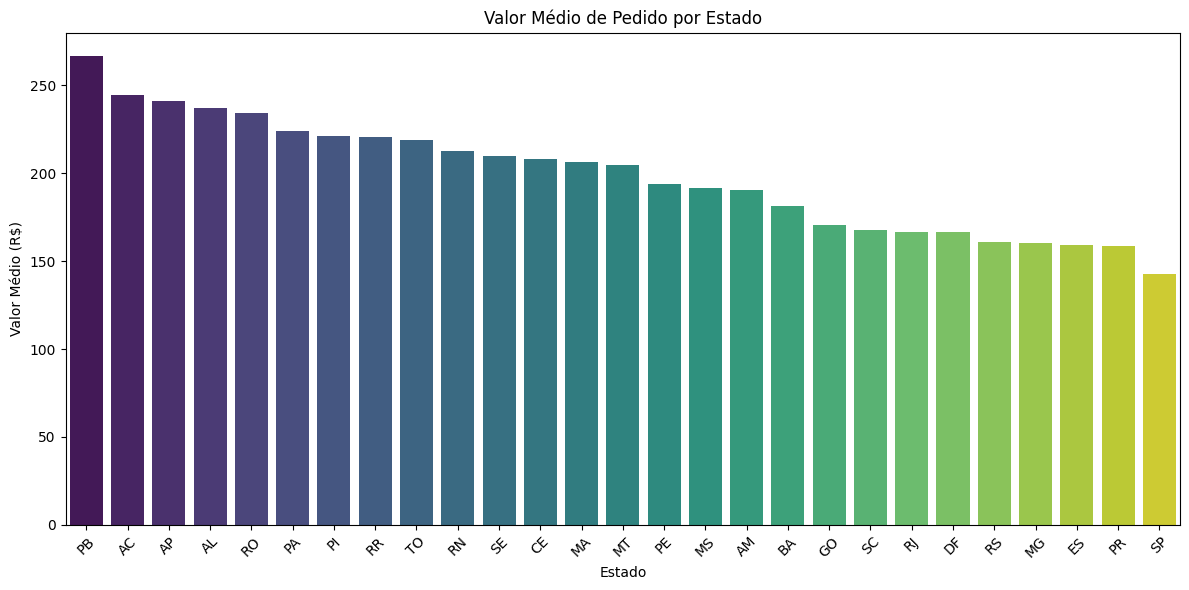

,customer_state,valor_total
0,PB,266.612282
1,AC,244.691625
2,AP,240.922537
3,AL,237.210302
4,RO,234.427984
5,PA,224.126395
6,PI,220.962584
7,RR,220.476098
8,TO,219.005000
9,RN,212.478439


In [34]:
itens['valor_total'] = itens['price'] + itens['freight_value']

valor_por_pedido = itens.groupby('order_id')['valor_total'].sum().reset_index()

pedidos_com_valor = pd.merge(pedidos[['order_id', 'customer_id']], valor_por_pedido, on='order_id')

pedidos_com_estado = pd.merge(pedidos_com_valor, clientes[['customer_id', 'customer_state']], on='customer_id')

media_por_estado = pedidos_com_estado.groupby('customer_state')['valor_total'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))

sns.barplot(
    data=media_por_estado,
    x='customer_state',
    y='valor_total',
    palette='viridis',
    hue='customer_state',
    legend=False  # Remove a legenda redundante
)

plt.title('Valor Médio de Pedido por Estado')
plt.xlabel('Estado')
plt.ylabel('Valor Médio (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

media_por_estado

# A análise abaixo evidencia os estados com os maiores valores médios de compra. Informação utilizada para estratégia de marketing, precificação e logística.


# **3. Solução de Problemas de Negócio**

### 3.1 Análise de Retenção: Calcule a taxa de clientes recorrentes. Considere um cliente recorrente aquele que fez mais de um pedido no período analisado. Quais insights podemos extrair destes dados?

In [35]:
# Juntando pedidos com clientes
clientes_pedidos = pedidos.merge(clientes, on='customer_id', how='left')

# Contando número de pedidos por cliente
pedidos_por_cliente = clientes_pedidos.groupby('customer_unique_id')['order_id'].count().reset_index()
pedidos_por_cliente.columns = ['customer_unique_id', 'qtd_pedidos']

# Classificando cliente recorrente (mais de 1 pedido)
pedidos_por_cliente['recorrente'] = pedidos_por_cliente['qtd_pedidos'] > 1

# Calculando taxa de recorrência
taxa_recorrencia = pedidos_por_cliente['recorrente'].mean()

print(f"Taxa de clientes recorrentes: {taxa_recorrencia:.2%}")

Taxa de clientes recorrentes: 3.00%


*💡 Insight: Uma taxa alta de recorrência indica fidelização. Uma taxa baixa pode sugerir problemas de experiência, logística ou qualidade.*

#### 3.2 Predição de Atraso: Crie um modelo simples para prever se um pedido será entregue com atraso.

* Defina o que seria um pedido atrasado (baseado nas colunas disponíveis)
* Use os campos relevantes para criar features para seu modelo
* Divida o dataset em treino e teste
* Implemente um modelo de classificação simples (pode usar Regressão Logística, Random Forest ou outro de sua escolha)
* Avalie a performance do modelo e explique os resultados

##### 3.2.1 Definindo pedido atrasado

In [36]:
# Convertendo colunas de data
pedidos['order_delivered_customer_date'] = pd.to_datetime(pedidos['order_delivered_customer_date'])
pedidos['order_estimated_delivery_date'] = pd.to_datetime(pedidos['order_estimated_delivery_date'])

# Criando variável target: se foi entregue depois da estimativa
pedidos['pedido_atrasado'] = pedidos['order_delivered_customer_date'] > pedidos['order_estimated_delivery_date']


##### 3.2.2 Criando features

In [38]:
# Juntando pedidos com itens e produtos
df_modelo = pedidos.merge(itens, on='order_id', how='left') \
                   .merge(produtos[['product_id', 'product_category_name']], on='product_id', how='left')

# Criando colunas úteis
df_modelo['tempo_envio'] = (pd.to_datetime(df_modelo['shipping_limit_date']) - pd.to_datetime(df_modelo['order_purchase_timestamp'])).dt.days
df_modelo['dias_entrega_real'] = (df_modelo['order_delivered_customer_date'] - pd.to_datetime(df_modelo['order_approved_at'])).dt.days

# Selecionando features
df_modelo = df_modelo[['tempo_envio', 'dias_entrega_real', 'freight_value', 'pedido_atrasado']].dropna()


##### 3.2.3 Treinando modelo

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Separando features e target
X = df_modelo[['tempo_envio', 'dias_entrega_real', 'freight_value']]
y = df_modelo['pedido_atrasado']

# Treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Avaliando
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.97      0.98      0.98     30467
        True       0.73      0.68      0.70      2587

    accuracy                           0.96     33054
   macro avg       0.85      0.83      0.84     33054
weighted avg       0.95      0.96      0.95     33054



*💡 Insight: Avalie os erros de previsão. Se o modelo erra muito, talvez seja necessário refinar as features ou tentar outro algoritmo.*

### 3.3. Segmentação de Clientes: Utilize técnicas de clustering para segmentar os clientes em grupos. Analise o comportamento de cada grupo e sugira estratégias de marketing específicas para cada um.

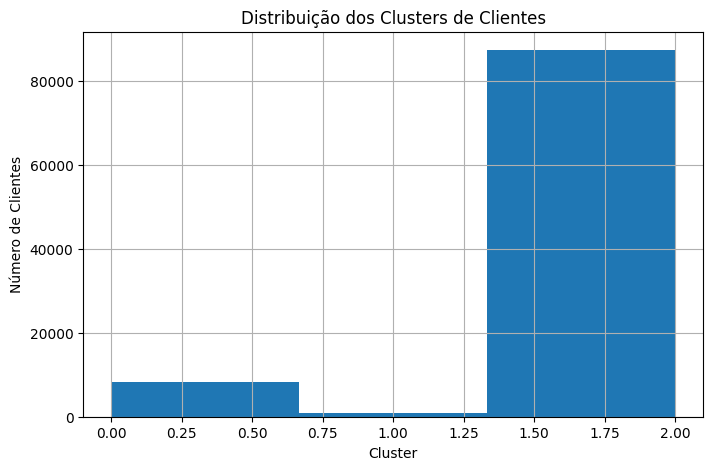

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Agrupando pedidos por cliente
faturamento_cliente = pedidos.merge(itens, on='order_id') \
                             .groupby('customer_id')['price'].sum().reset_index()

# Padronizando
scaler = StandardScaler()
faturamento_cliente_scaled = scaler.fit_transform(faturamento_cliente[['price']])

# KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
faturamento_cliente['cluster'] = kmeans.fit_predict(faturamento_cliente_scaled)

# Visualizando
plt.figure(figsize=(8, 5))
plt.hist(faturamento_cliente['cluster'], bins=3)
plt.title('Distribuição dos Clusters de Clientes')
plt.xlabel('Cluster')
plt.ylabel('Número de Clientes')
plt.grid(True)
plt.show()


*💡 Insight: Clientes de maior valor (cluster mais valioso) podem receber campanhas personalizadas. Clusters de menor valor podem ser trabalhados com ofertas ou fidelização.*

### 3.4. Análise de Satisfação: Explore a relação entre a nota de avaliação dos clientes e diferentes aspectos como categoria do produto, tempo de entrega, valor do pedido, etc. Identifique fatores que mais impactam na satisfação do cliente.

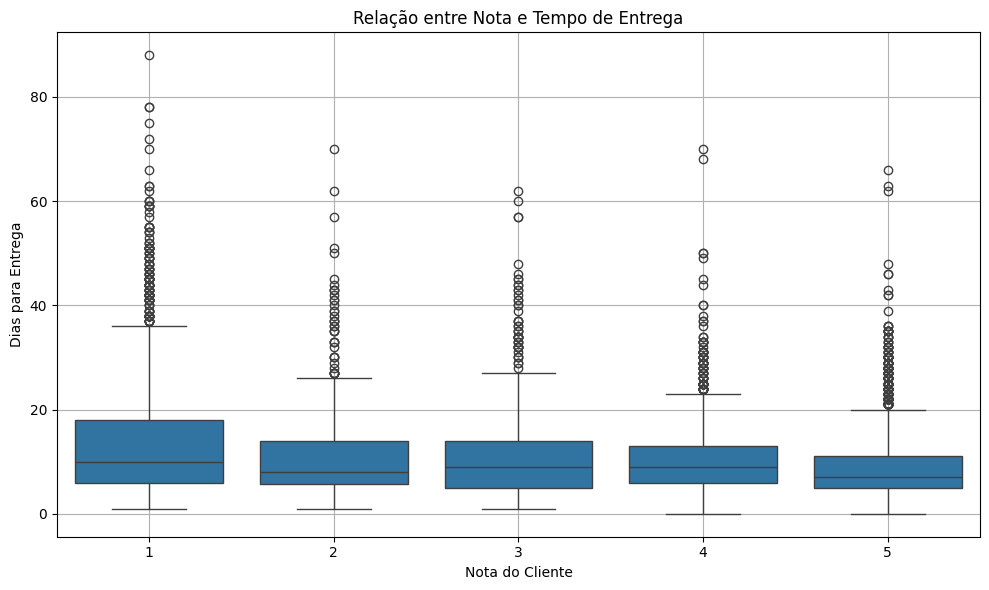

In [42]:
# Juntando com pedidos e produtos
avaliacoes = avaliacoes.merge(pedidos, on='order_id', how='left') \
                       .merge(itens[['order_id', 'product_id']], on='order_id', how='left') \
                       .merge(produtos[['product_id', 'product_category_name']], on='product_id', how='left')

# Criando coluna de tempo de entrega
avaliacoes['order_delivered_customer_date'] = pd.to_datetime(avaliacoes['order_delivered_customer_date'])
avaliacoes['order_purchase_timestamp'] = pd.to_datetime(avaliacoes['order_purchase_timestamp'])
avaliacoes['dias_entrega'] = (avaliacoes['order_delivered_customer_date'] - avaliacoes['order_purchase_timestamp']).dt.days

# Analisando relação entre nota e tempo de entrega
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='review_score', y='dias_entrega', data=avaliacoes)
plt.title('Relação entre Nota e Tempo de Entrega')
plt.xlabel('Nota do Cliente')
plt.ylabel('Dias para Entrega')
plt.grid(True)
plt.tight_layout()
plt.show()


*💡 Insight: Notas mais baixas geralmente estão associadas a maiores prazos ou atrasos. Produtos com notas consistentemente baixas podem indicar problemas de qualidade ou logística.*

# **4. Visualização e Dashboards**

### 4.1 Criação de dashboard geral que mostre a evolução das vendas ao longo do tempo, com filtros por estado e categoria de produto

In [52]:
# Junção produtos + categorias
produtos = produtos.merge(categorias, on='product_category_name', how='left')

# Junção completa para visualizações
df = itens.merge(pedidos, on='order_id', how='left')\
          .merge(clientes, on='customer_id', how='left')\
          .merge(produtos, on='product_id', how='left')\
          .merge(vendedores, on='seller_id', how='left')\
          .merge(avaliacoes[['order_id', 'review_score']], on='order_id', how='left')\
          .merge(pagamentos, on='order_id', how='left')

# Conversão de datas
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

In [53]:
import plotly.express as px

df['order_date'] = df['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()
vendas_tempo = df.groupby(['order_date', 'customer_state', 'product_category_name_english'])['price'].sum().reset_index()

fig = px.line(
    vendas_tempo,
    x='order_date',
    y='price',
    color='product_category_name_english',
    facet_col='customer_state',
    facet_col_wrap=5,
    title='Evolução das Vendas ao Longo do Tempo por Estado e Categoria'
)
fig.show()


### 4.2 Um mapa de calor mostrando a concentração de vendas por região/estado do Brasil

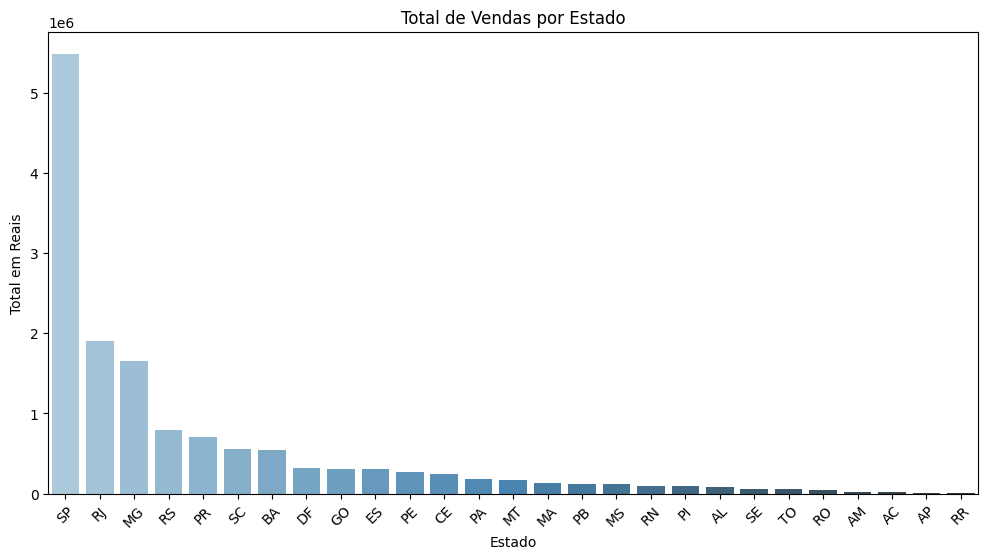

In [58]:
vendas_estado = df.groupby('customer_state')['price'].sum().reset_index().sort_values(by='price', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=vendas_estado, x='customer_state', y='price', hue='customer_state', palette='Blues_d', dodge=False, legend=False)
plt.title('Total de Vendas por Estado')
plt.xticks(rotation=45)
plt.xlabel('Estado')
plt.ylabel('Total em Reais')
plt.show()

### 4.3 Um conjunto de gráficos que apresente a relação entre avaliação do cliente e tempo de entrega

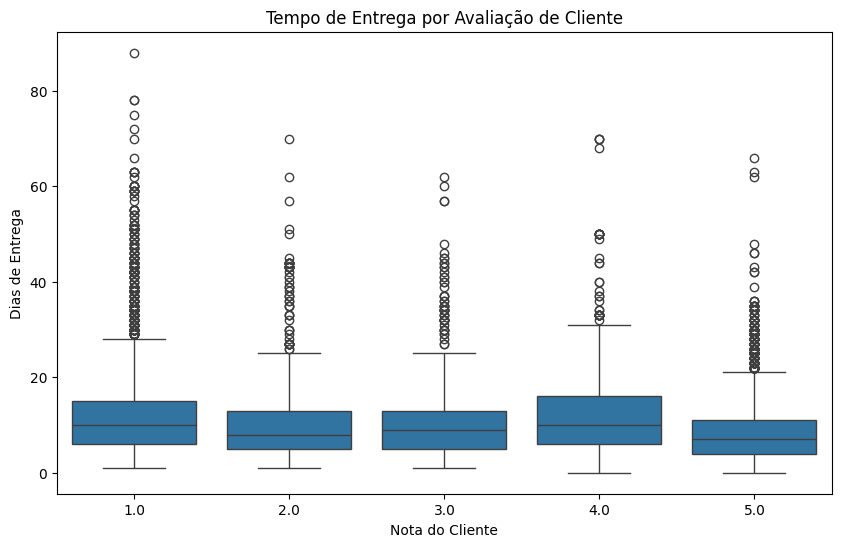

In [55]:
df['tempo_entrega'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

tempo_vs_avaliacao = df[['review_score', 'tempo_entrega']].dropna()

plt.figure(figsize=(10, 6))
sns.boxplot(data=tempo_vs_avaliacao, x='review_score', y='tempo_entrega')
plt.title('Tempo de Entrega por Avaliação de Cliente')
plt.xlabel('Nota do Cliente')
plt.ylabel('Dias de Entrega')
plt.show()

### 4.4 Um dashboard de análise dos vendedores, mostrando quais têm melhor desempenho em termos de volume de vendas, satisfação do cliente e tempo de entrega

In [56]:
# Tempo de entrega por vendedor
df['tempo_entrega'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

vendedores_df = df.groupby('seller_id').agg({
    'price': 'sum',
    'review_score': 'mean',
    'tempo_entrega': 'mean'
}).reset_index()

# Top 10 por volume de vendas
top_vendedores = vendedores_df.sort_values(by='price', ascending=False).head(10)

fig = px.bar(
    top_vendedores,
    x='seller_id',
    y='price',
    color='review_score',
    hover_data=['tempo_entrega'],
    title='Top 10 Vendedores por Volume de Vendas'
)
fig.show()

In [57]:
top_vendedores

,seller_id,price,review_score,tempo_entrega
1013,53243585a1d6dc2643021fd1853d8905,247588.35,2.828125,12.882619
857,4869f7a5dfa277a7dca6462dcf3b52b2,238798.03,4.020833,14.696203
1535,7c67e1448b00f6e969d365cea6b010ab,235832.09,2.750583,22.272141
881,4a3ca9315b744ce9f8e9374361493884,218112.67,3.590244,13.669460
3024,fa1c13f2614d7b5c4749cbc52fecda94,204631.92,4.041667,12.805281
1560,7e93a43ef30c4f03f38b393420bc753a,182878.17,5.000000,10.874251
2643,da8622b14eb17ae2831f4ac5b9dab84a,175630.37,3.960199,10.501465
1824,955fee9216a65b617aa5c0531780ce60,156830.98,3.153488,10.216853
192,1025f0e2d44d7041d6cf58b6550e0bfa,156700.16,3.209302,11.139906
1505,7a67c85e85bb2ce8582c35f2203ad736,151001.70,3.291667,10.518219
